In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from zipfile import ZipFile
dataset_path = '/content/drive/MyDrive/Shows/project.zip'
with ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install nlp_utils
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 24.2 MB/s 
     |████████████████████████████████| 106 kB 12.7 MB/s 


In [26]:
import re
import nltk
import string
import nlp_utils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [54]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams,bigrams,trigrams


In [ ]:
df=pd.read_csv('/content/Toxic+Comment+Classifier+files/Notebook/train.csv')
df 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df['toxic'].value_counts() 

0    144277
1     15294
Name: toxic, dtype: int64

In [ ]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [47]:
Toxic_comment_df=df.loc[:,['id','comment_text','toxic']]
Insulting_comment_df=df.loc[:,['id','comment_text','insult']]
IdentityHate_comment_df=df.loc[:,['id','comment_text','identity_hate']]
Obscene_comment_df=df.loc[:,['id','comment_text','obscene']]
Threatening_comment_df=df.loc[:,['id','comment_text','threat']]
Severetoxic_comment_df=df.loc[:,['id','comment_text','severe_toxic']]


In [46]:
Toxic_comment_df

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [27]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

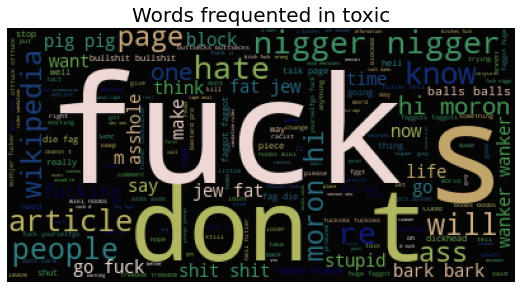

In [28]:
wordcloud(Toxic_comment_df, 'toxic')

In [34]:
Toxic_comment_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [31]:
Toxic_comment_balanced_0 = Toxic_comment_df[Toxic_comment_df['toxic'] == 0].iloc[0:5000,:]
Toxic_comment_balanced_1 = Toxic_comment_df[Toxic_comment_df['toxic'] == 1].iloc[0:5000,:]
Toxic_comment_balanced=pd.concat([Toxic_comment_balanced_1,Toxic_comment_balanced_0])


In [32]:
Toxic_comment_balanced['toxic'].value_counts()

1    5000
0    5000
Name: toxic, dtype: int64

In [37]:
Severetoxic_comment_df['severe_toxic'].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [36]:
Severetoxic_comment_balanced_0 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 0].iloc[0:1590,:]
Severetoxic_comment_balanced_1 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 1].iloc[0:1590,:]
Severetoxic_comment_balanced=pd.concat([Severetoxic_comment_balanced_1,Severetoxic_comment_balanced_0])

In [39]:
Obscene_comment_df['obscene'].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [40]:
Obscene_comment_df_0 = Obscene_comment_df[Obscene_comment_df['obscene'] == 0].iloc[0:5000,:] 
Obscene_comment_df_1 = Obscene_comment_df[Obscene_comment_df['obscene'] == 1].iloc[0:5000,:]
Obscene_comment_balanced = pd.concat([Obscene_comment_df_1,Obscene_comment_df_0])


In [45]:
Threatening_comment_df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [48]:
Threatening_comment_df_0 = Threatening_comment_df[Threatening_comment_df['threat'] == 0].iloc[0:470,:]
Threatening_comment_df_1 = Threatening_comment_df[Threatening_comment_df['threat'] == 1].iloc[0:470,:]
Threatening_comment_balanced = pd.concat([Threatening_comment_df_1,Threatening_comment_df_0])

In [49]:
Threatening_comment_balanced['threat'].value_counts()


1    470
0    470
Name: threat, dtype: int64

In [50]:
Insulting_comment_df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [51]:
Insulting_comment_df_0 = Insulting_comment_df[Insulting_comment_df['insult'] == 0].iloc[0:5000,:]
Insulting_comment_df_1 = Insulting_comment_df[Insulting_comment_df['insult'] == 1].iloc[0:5000,:]
Insulting_comment_balanced = pd.concat([Insulting_comment_df_1,Insulting_comment_df_0])

In [52]:
IdentityHate_comment_df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

In [53]:
IdentityHate_comment_df_0 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 0].iloc[0:1400,:]
IdentityHate_comment_df_1 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 1].iloc[0:1400,:]
IdentityHate_comment_balanced = pd.concat([IdentityHate_comment_df_1,IdentityHate_comment_df_0])

In [56]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):
    X = dataframe.comment_text
    y = dataframe[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    X_train_cv1 = cv1.fit_transform(X_train) 
    X_test_cv1  = cv1.transform(X_test)      
    
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
  
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
    randomforest.fit(X_train_cv1, y_train)
    
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                   
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1


In [57]:
severe_toxic_comment_cv = cv_tf_train_test(Severetoxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
severe_toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
severe_toxic_comment_cv

,F1 Score(severe_toxic)
Log Regression,0.939394
KNN,0.843636
BernoulliNB,0.804498
MultinomialNB,0.939487
SVM,0.935313
Random Forest,0.917004


In [58]:
obscene_comment_cv = cv_tf_train_test(Obscene_comment_balanced, 'obscene', TfidfVectorizer, (1,1))
obscene_comment_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
obscene_comment_cv

,F1 Score(obscene)
Log Regression,0.901183
KNN,0.625341
BernoulliNB,0.766640
MultinomialNB,0.887496
SVM,0.915613
Random Forest,0.884261


In [59]:
threat_comment_cv = cv_tf_train_test(Threatening_comment_balanced, 'threat', TfidfVectorizer, (1,1))
threat_comment_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
threat_comment_cv

,F1 Score(threat)
Log Regression,0.914729
KNN,0.832215
BernoulliNB,0.767908
MultinomialNB,0.911661
SVM,0.911197
Random Forest,0.913208


In [60]:
insult_comment_cv = cv_tf_train_test(Insulting_comment_balanced, 'insult', TfidfVectorizer, (1,1))
insult_comment_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
insult_comment_cv

,F1 Score(insult)
Log Regression,0.901851
KNN,0.320661
BernoulliNB,0.776986
MultinomialNB,0.896299
SVM,0.906218
Random Forest,0.890821


In [61]:
identity_hatecomment_cv = cv_tf_train_test(IdentityHate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identity_hatecomment_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)
identity_hatecomment_cv

,F1 Score(identity_hate)
Log Regression,0.904762
KNN,0.762155
BernoulliNB,0.787879
MultinomialNB,0.903915
SVM,0.892157
Random Forest,0.892812


In [62]:
X = Toxic_comment_balanced.comment_text
y = Toxic_comment_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  
X_test_fit = tfv.transform(X_test)  
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1])

In [63]:
comment1 = ['i killed an insect and ate it']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.73519444])

In [73]:
comment1 = ['Is this sentence good']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.08770635])